In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [5]:
# Read the file
datafile = pd.read_csv('MY_NSE-TATAGLOBAL.csv')

In [6]:
#head
datafile.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [7]:
## Closing price will be our target variable
# Plot the closing price vs date
datafile['Date'] = pd.to_datetime(datafile.Date, format='%Y-%m-%d')
datafile.index = datafile['Date']

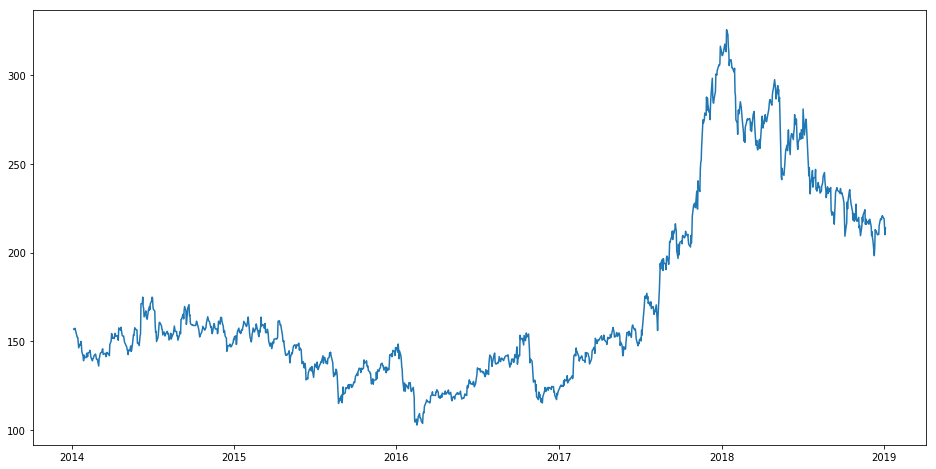

In [8]:
# Plot it
plt.figure(figsize=(16,8))
plt.plot(datafile['Close'], label = 'Close Price History')

In [9]:
## Predicted closing price for each day will be the 
## average of a set or previously observed values

## FIRST STEP
# Create a dataframe that contains only the date and close price columns
# Then split it into train and validation sets 

In [10]:
# DataFrame with date and close
data = datafile.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(datafile)), columns = ['Date', 'Close'])

In [11]:
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [12]:
# Split into train and validation 
# Cannot do it randomly because are in order by date
train = new_data[:987]
valid = new_data[987:]

In [13]:
new_data.shape
#(1234,2)

(1234, 2)

In [14]:
train.shape
#(987,2)

(987, 2)

In [15]:
valid.shape
#(247,2)

(247, 2)

In [16]:
#Make sure no overlap
train['Date'].min()

Timestamp('2014-01-06 00:00:00')

In [17]:
train['Date'].max()

Timestamp('2018-01-03 00:00:00')

In [18]:
valid['Date'].min()

Timestamp('2018-01-04 00:00:00')

In [19]:
valid['Date'].max()

Timestamp('2019-01-04 00:00:00')

In [20]:
# Time to create predictions
predictions = []
for i in range(0,247):
    a = train['Close'][len(train)-248+i:].sum() + sum(predictions)
    b = a / 248
    predictions.append(b)

In [21]:
# Root mean Square deviation
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-predictions),2)))
rms

61.029660940357545

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


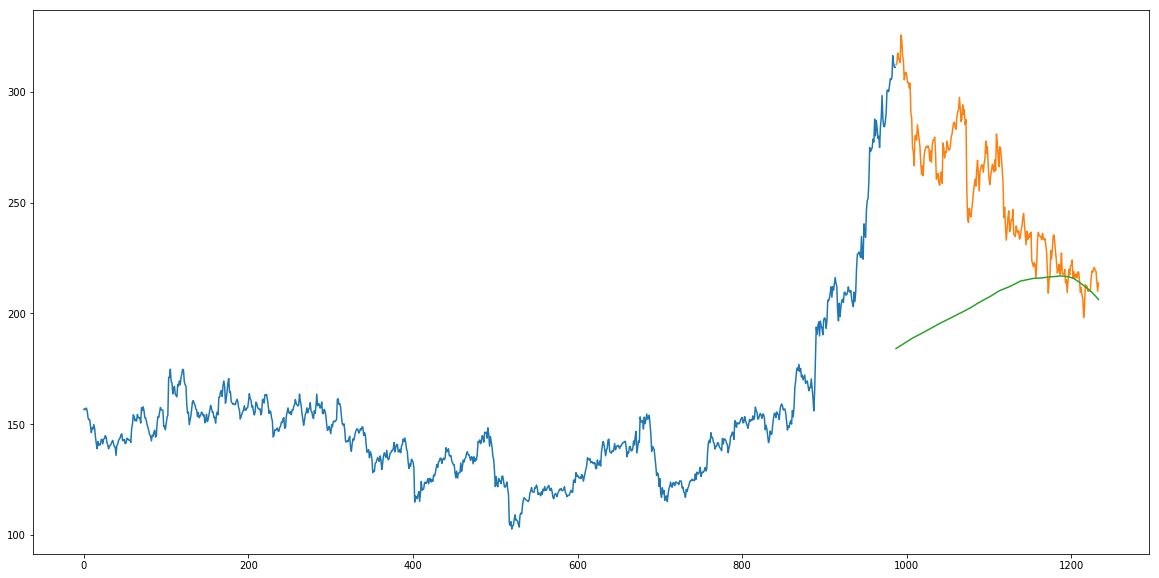

In [22]:
# Plot predicted value and actual value
valid['Predictions'] = 0
valid['Predictions'] = predictions
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# Plot is understanding trends, not necesarily accurate though

In [23]:
# First sort dataset, then create new one to ammend while keeping original intact
datafile['Date'] = pd.to_datetime(datafile.Date,format='%Y-%m-%d')
datafile.index = datafile['Date']

In [24]:
#sorting the datafile based on date
data = datafile.sort_index(ascending=True, axis=0)

In [25]:
#creating new dataset to be worked on 
new_data = pd.DataFrame(index = range(0,len(datafile)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [26]:
# create new features to be split on.
    # Year, month, dat, dayofweek, etc
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed',axis=1, inplace= True) # Elapsed is the time stamp

In [27]:
# is monday or friday?
# new_data['mon_fri'] = 0
# for i in range(0, len(new_data)):
  #   if(new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i]==4):
    #     new_data['mon_fri'][i] = 1
    # else:
      #   new_data['mon_fri'][i] = 0

In [28]:
# split into train and validation 
train = new_data[:987]
valid = new_data[987:]

In [29]:
x_train = train.drop('Close', axis = 1)
y_train = train['Close']
x_valid = valid.drop('Close', axis = 1)
y_valid = valid['Close']

In [30]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# make prediction with this linear regression 
prediction = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid)- np.array(prediction)),2)))
rms

87.49318803408663

In [32]:
# plot to see results 
valid['Predictions'] = 0
valid['Predictions'] = prediction

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
valid.index = new_data[987:].index
train.index = new_data[:987].index

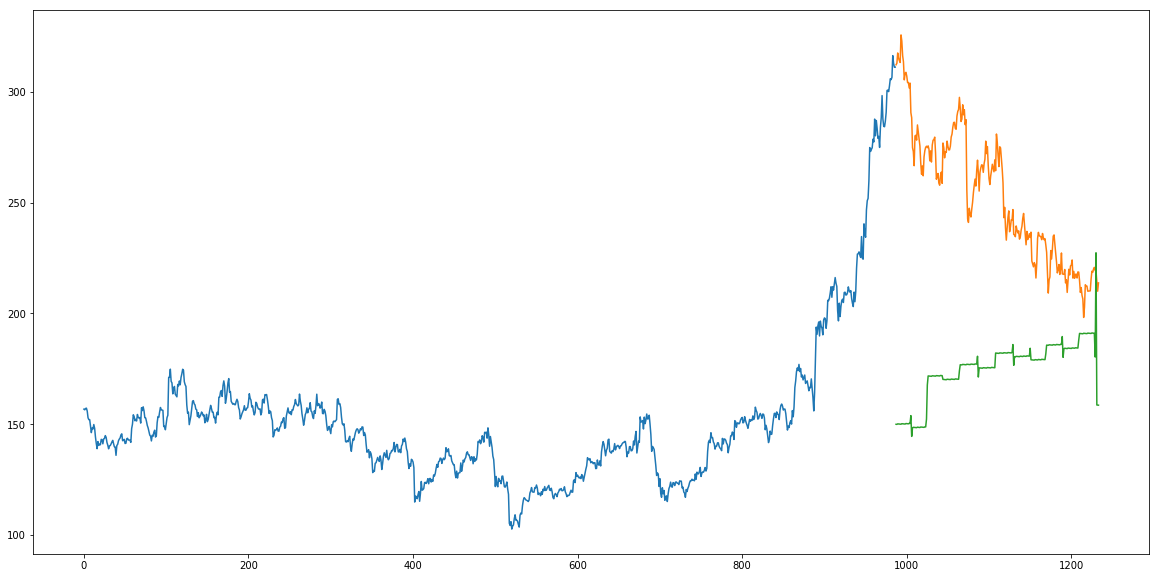

In [34]:
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [35]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
# scaling the data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv = 5)

In [39]:
# fit model and make predictions 
model.fit(x_train, y_train)
prediction = model.predict(x_valid)

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(prediction)),2)))
rms

105.7309297596694

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


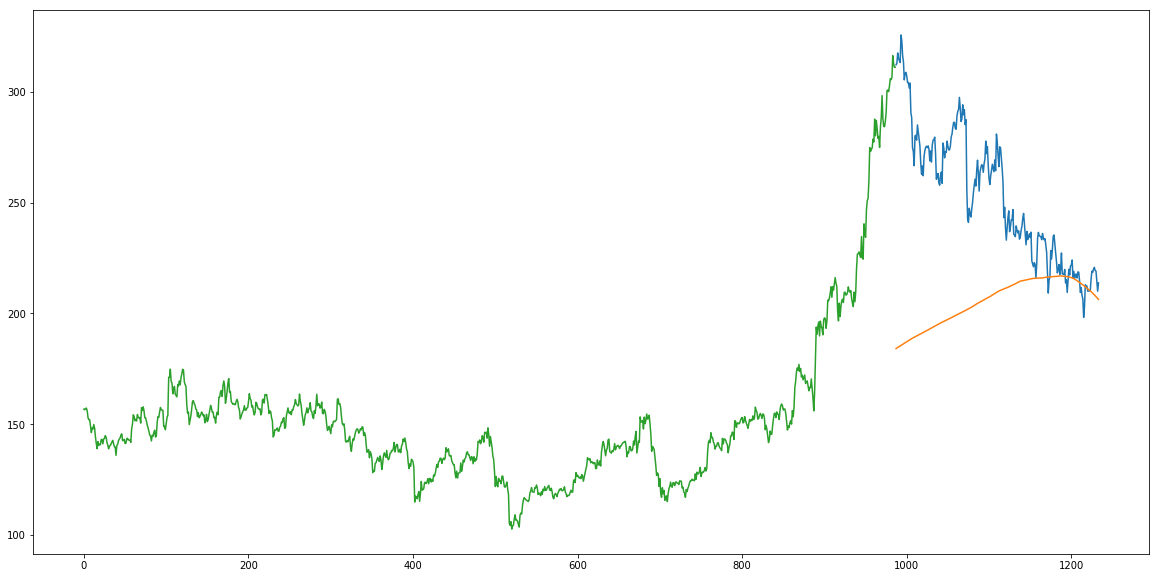

In [41]:
valid['Predictions'] = 0
valid['Predictions'] = predictions
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

#### Auto Arima Killing Kernel, not executing this section

In [58]:
from pyramid.arima import auto_arima

In [59]:
data = datafile.sort_index(ascending = True, axis = 0)
train = data[:987]
valid = data[987:]

In [60]:
training = train['Close']
validation = valid['Close']

In [1]:
model = auto_arima(training, start_p = 1, start_q = 1,
                   max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                   d = 1, D = 1, trace = True, error_action = 'ignore', 
                   suppress_warnings = True)

NameError: name 'auto_arima' is not defined

In [ ]:
model.fit(training)

forecast = model.predict(n_periods = 247)
forecast = pd.DataFrame(forecast, index = valid.index, columns = ['Prediction'])

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [42]:
## PROPHET - input (dataFrame with date and target)
from fbprophet import Prophet

In [43]:
new_data = pd.DataFrame(index=range(0, len(datafile)), columns = ['Date', 'Close'])

In [44]:
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [45]:
new_data['Date'] = pd.to_datetime(new_data.Date, format='%Y-%m-%d')
new_data.index = new_data['Date']

In [46]:
new_data.rename(columns = {'Close':'y', 'Date': 'ds'}, inplace = True)

In [47]:
train = new_data[:987]
valid = new_data[987:]

In [48]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [50]:
forecast_valid = forecast['yhat'][987:]
rms = np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

93.90595834773676

In [51]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


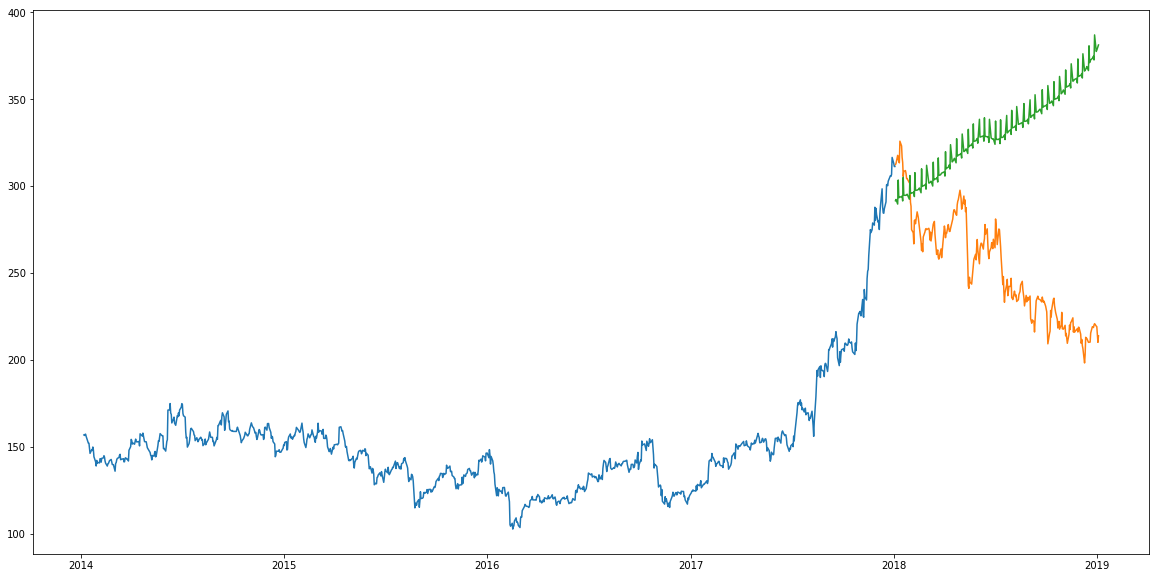

In [52]:
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [53]:
# Long Short Term Memory LSTM
# input gate: info to cell state
# forget gate: removes no longer important info
# output gate: selects output


In [54]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [57]:
#creating dataframe
data = datafile.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(datafile)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [58]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [59]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

In [60]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [62]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [63]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 90s - loss: 0.0026


In [65]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [66]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [68]:
rms = np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

20.120183023434187

/Users/JonahTuckman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


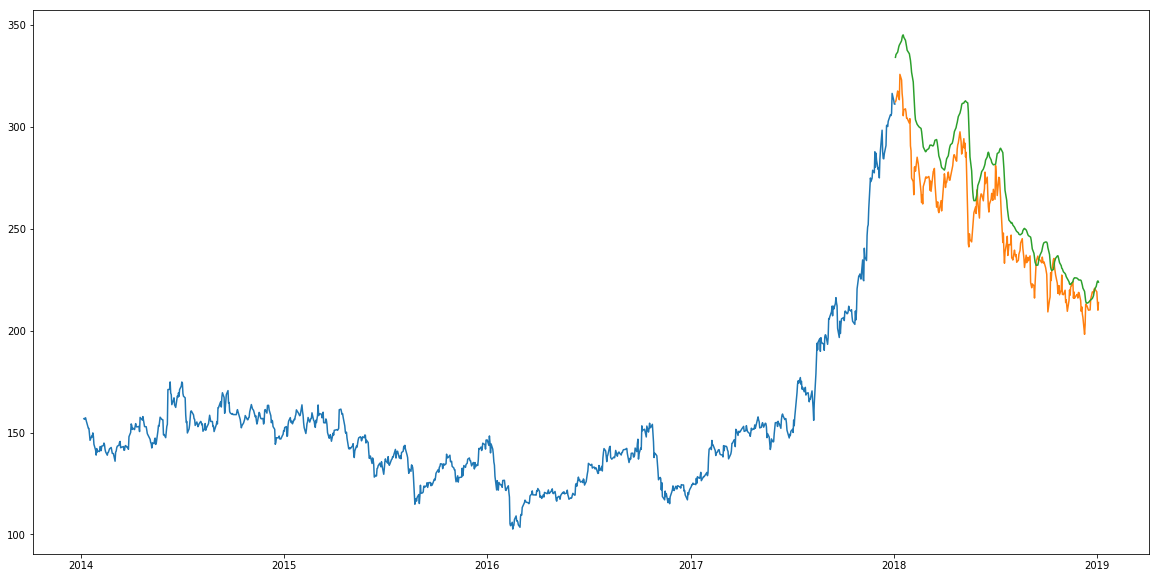

In [69]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])